<a href="https://colab.research.google.com/github/new2code-Laura/Golf_Sim/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import zscore
from scipy.stats import norm, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Enable ASC/AirView_DublinCity_Measurements_ugm3.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.head() # showing the first 5 columns to get an idea of what is in this dataset

,gps_timestamp,latitude,longitude,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PMch1_perL,PMch2_perL,PMch3_perL,PMch4_perL,PMch5_perL,PMch6_perL,PM25_ugm3
0,2022-04-07 14:56:36 UTC,53.346434,-6.263997,-13.526,11.724,NaN,0.293,765.328,6240.0,1860.0,1380.0,480.0,60.0,120.0,4.927
1,2022-04-07 14:56:37 UTC,53.346434,-6.263997,-29.957,4.441,NaN,0.291,NaN,4800.0,1380.0,1020.0,240.0,240.0,60.0,4.240
2,2022-04-07 14:56:38 UTC,53.346434,-6.263997,-9.260,8.725,59.109,0.299,NaN,6300.0,1800.0,1140.0,600.0,60.0,60.0,4.204
3,2022-04-07 14:56:39 UTC,53.346434,-6.263997,-22.847,7.023,NaN,0.295,NaN,5040.0,1800.0,1080.0,300.0,60.0,60.0,3.410
4,2022-04-07 14:56:40 UTC,53.346434,-6.263997,-9.225,15.591,NaN,0.296,763.271,5580.0,1920.0,1260.0,480.0,60.0,60.0,4.003


In [3]:
df.shape # checking the number of rows and columns

(5030143, 15)

In [4]:
df.columns

Index(['gps_timestamp', 'latitude', 'longitude', 'NO_ugm3', 'NO2_ugm3',
       'O3_ugm3', 'CO_mgm3', 'CO2_mgm3', 'PMch1_perL', 'PMch2_perL',
       'PMch3_perL', 'PMch4_perL', 'PMch5_perL', 'PMch6_perL', 'PM25_ugm3'],
      dtype='object')

In [5]:
air = df.iloc[:, 3:] # I'm chosing to make the dataset from column 3 onwards and calling it 'air'

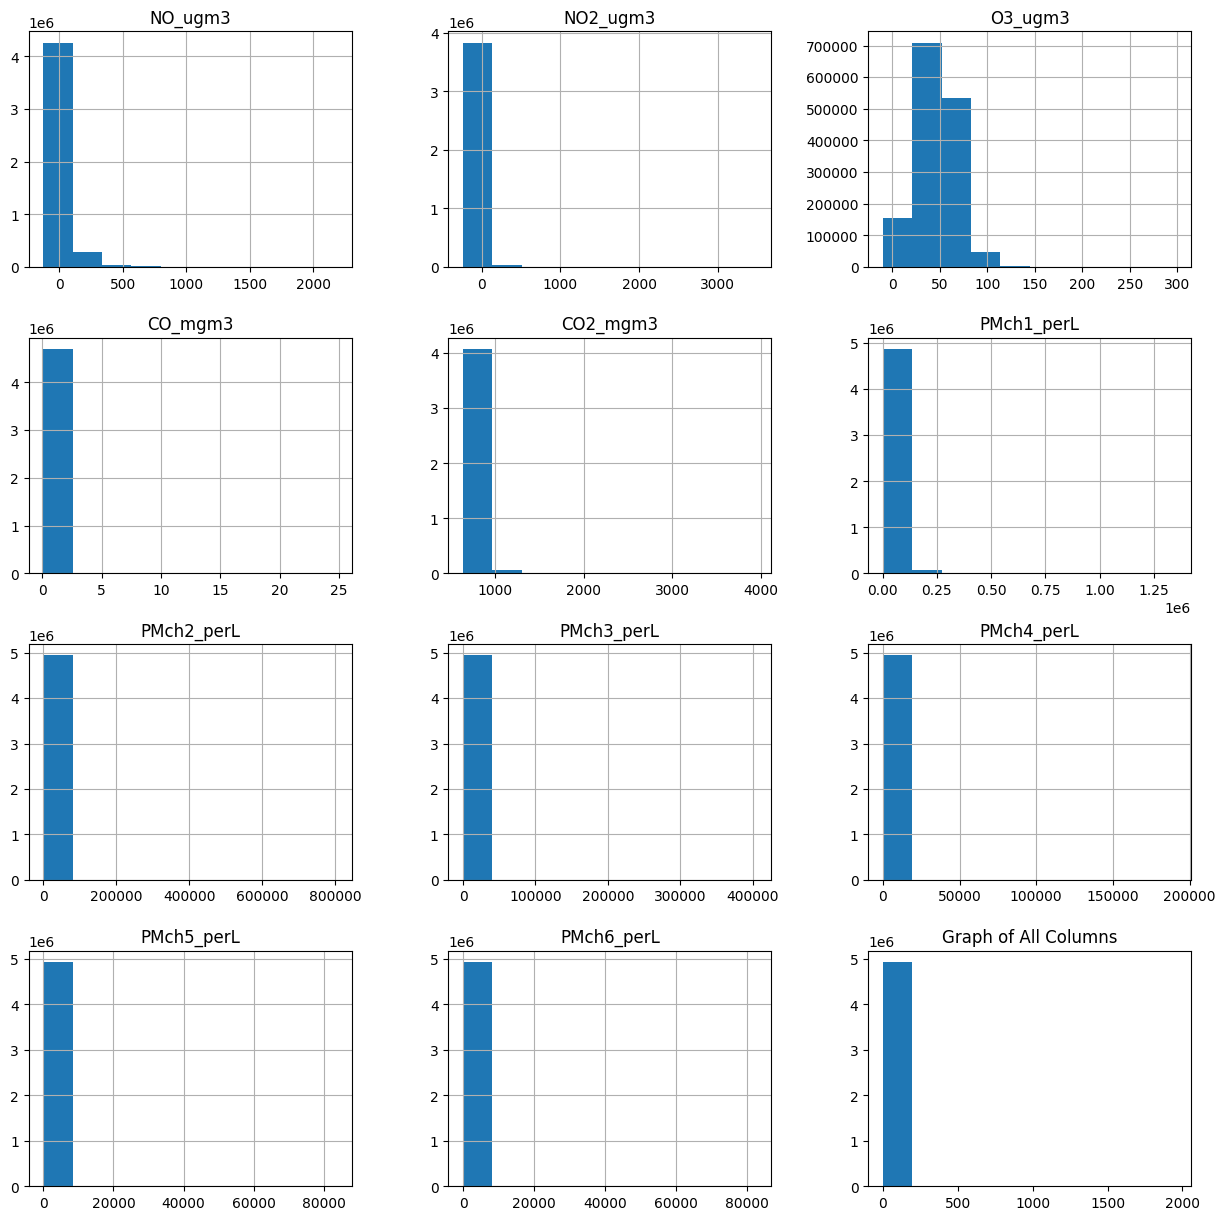

In [6]:
# histograms per column
air.hist(figsize=(15, 15))  # Adjust figsize as needed
plt.title('Graph of All Columns')
plt.grid()
plt.show()

In [7]:
air.info() # breaking down the info of what I'll need - decided not to use .head() because I don't need the figures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030143 entries, 0 to 5030142
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   NO_ugm3     float64
 1   NO2_ugm3    float64
 2   O3_ugm3     float64
 3   CO_mgm3     float64
 4   CO2_mgm3    float64
 5   PMch1_perL  float64
 6   PMch2_perL  float64
 7   PMch3_perL  float64
 8   PMch4_perL  float64
 9   PMch5_perL  float64
 10  PMch6_perL  float64
 11  PM25_ugm3   float64
dtypes: float64(12)
memory usage: 460.5 MB


2.3 DATA CLEANSING

In [8]:
air.isnull().sum() # checking number of missing values per column

,0
NO_ugm3,418699
NO2_ugm3,1165108
O3_ugm3,3582771
CO_mgm3,321269
CO2_mgm3,898496
PMch1_perL,89877
PMch2_perL,89877
PMch3_perL,89877
PMch4_perL,89877
PMch5_perL,89877


In [9]:
# imputing the missing values with the mean from that column
imputer = SimpleImputer(strategy='mean')
air.iloc[:, :] = imputer.fit_transform(air)

# checking for missing values after imputing once again
air.isnull().sum()

,0
NO_ugm3,0
NO2_ugm3,0
O3_ugm3,0
CO_mgm3,0
CO2_mgm3,0
PMch1_perL,0
PMch2_perL,0
PMch3_perL,0
PMch4_perL,0
PMch5_perL,0


In [10]:
air.nunique(dropna=False) # checking for duplicates/unique values in a column

,0
NO_ugm3,267026
NO2_ugm3,121445
O3_ugm3,991
CO_mgm3,4918
CO2_mgm3,181606
PMch1_perL,7467
PMch2_perL,1857
PMch3_perL,685
PMch4_perL,401
PMch5_perL,356


In [11]:
air.duplicated().sum() # checking for duplicates

8592

In [12]:
air.drop_duplicates(inplace=True) # dropping duplicates

In [13]:
air.shape # checking the shape of the dataset after dropping duplicates

(5021551, 12)

In [14]:
# not a high number of duplicated values compared to total dataset so I going to leave them in cause it won't effect it significantly if left in and repeated values are to be expectedd in such a large dataset.

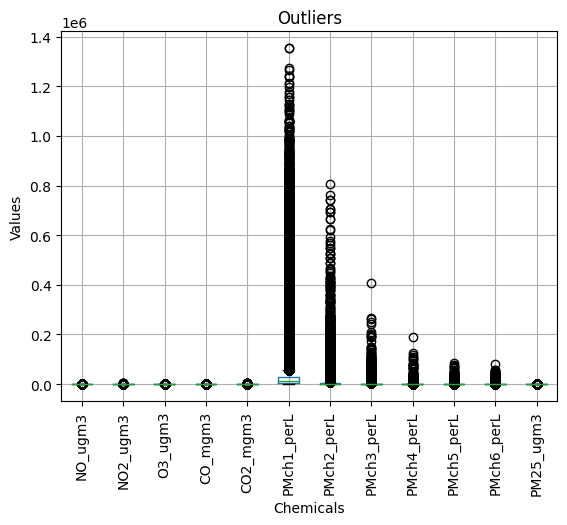

In [15]:
air.boxplot() # checking for outliers
plt.title('Outliers') # title of graph
plt.xticks(rotation=90) # rotating x-axis lables 90 degrees for more readability
plt.xlabel('Chemicals') # x-axis label
plt.ylabel('Values') # y-axis label
plt.show() # displaying graph

In [16]:
# **normalise the data to help with minimising outliers
scaler = StandardScaler()
air_scaled = scaler.fit_transform(air)

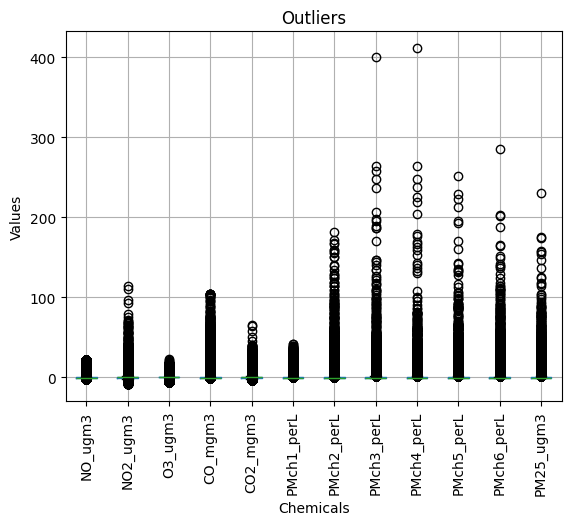

In [17]:
air_scaled = pd.DataFrame(air_scaled, columns=air.columns)
air_scaled.boxplot() # checking for outliers
plt.title('Outliers') # title of graph
plt.xticks(rotation=90) # rotating x-axis lables 90 degrees for more readability
plt.xlabel('Chemicals') # x-axis label
plt.ylabel('Values') # y-axis label
plt.show() # displaying graph

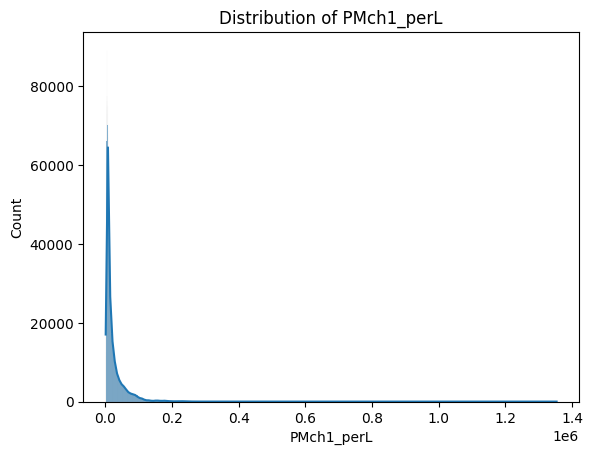

In [18]:
# trying to visualise outliers from distribution of PMch1_perL
column_5 = df['PMch1_perL']
sns.histplot(column_5, kde=True)
plt.title(f'Distribution of PMch1_perL')
plt.xlabel('PMch1_perL')
plt.show()

(2ND DATASET)

In [19]:
roaddf = pd.read_csv('/content/drive/MyDrive/Enable ASC/airview_dublincity_roaddata_ugm3.csv')

# CLEANING 2ND DATASET
print("shape of dataset: \n", roaddf.shape)
print("-" * 20 + "\n")

print("names of columns:\n", roaddf.columns)
print("-" * 20 + "\n")

print("info:\n", roaddf.info)
print("-" * 20 + "\n")

print("stats:\n", roaddf.describe())
print("-" * 20 + "\n")

print("first 5 rows:\n", roaddf.head())
print("-" * 20 + "\n")

print("last 5 rows:\n", roaddf.tail())
print("-" * 20 + "\n")

missing_values = roaddf.isnull().sum() # checking number of missing values per column
print("missing values", missing_values)
print("-" * 20 + "\n")

columns_to_drop = missing_values[missing_values > 0].index # Get the columns with missing values (more than 0 missing values)
roaddf = roaddf.drop(columns=columns_to_drop) # dropping columns with missing values
cleaned = roaddf.isnull().sum()
print("cleaned data:\n", roaddf)
print("-" * 20 + "\n")
print("null values:\n")
print(cleaned)

shape of dataset: 
 (24694, 30)
--------------------

names of columns:
 Index(['road_id', 'the_geom', 'osm_id', 'osm_code', 'osm_fclass', 'osm_name',
       'osm_ref', 'osm_oneway', 'osm_maxspeed', 'osm_layer', 'osm_bridge',
       'osm_tunnel', 'NO2points', 'NO2drives', 'NO2_ugm3', 'NOpoints',
       'NOdrives', 'NO_ugm3', 'CO2points', 'CO2drives', 'CO2_mgm3', 'COpoints',
       'COdrives', 'CO_mgm3', 'O3points', 'O3drives', 'O3_ugm3', 'PM25points',
       'PM25drives', 'PM25_ugm3'],
      dtype='object')
--------------------

info:
 <bound method DataFrame.info of        road_id                                           the_geom     osm_id  \
0      3633278  LINESTRING(-6.156470225 53.394400525, -6.15665...  497788125   
1      3639035  LINESTRING(-6.3266322 53.3421535, -6.3266241 5...  500417276   
2      2099409  LINESTRING(-6.1891464 53.3795598, -6.1895315 5...  236680313   
3      3636088  LINESTRING(-6.2796231 53.3262885, -6.2796544 5...  498987932   
4      3962473  LINESTRING

2.3 RESHAPING

In [20]:
# deleting columns latitude and longitude
air = df.drop(['latitude', 'longitude'], axis=1)
print(air.columns)

Index(['gps_timestamp', 'NO_ugm3', 'NO2_ugm3', 'O3_ugm3', 'CO_mgm3',
       'CO2_mgm3', 'PMch1_perL', 'PMch2_perL', 'PMch3_perL', 'PMch4_perL',
       'PMch5_perL', 'PMch6_perL', 'PM25_ugm3'],
      dtype='object')


In [21]:
# reshaping the data so that it reads per minute rather than per second
df['gps_timestamp'] = pd.to_datetime(df['gps_timestamp']) # convert column to datetime object
df.set_index('gps_timestamp', inplace=True) # must index column to engage resample()
df = df.resample('m').mean()  # calculating the mean per minute
df = df.resample('T').agg(
    {
     'NO_ugm3': 'mean'
    ,'NO2_ugm3': 'mean'
    ,'O3_ugm3': 'mean'
    ,'CO_mgm3': 'mean'
    ,'CO2_mgm3': 'mean'
    ,'PM25_ugm3': 'mean'
    ,'PMch1_perL': 'mean'
    ,'PMch2_perL': 'mean'
    ,'PMch3_perL': 'mean'
    ,'PMch4_perL': 'mean'
    ,'PMch5_perL': 'mean'
    ,'PMch6_perL': 'mean'
    })

<ipython-input-21-3578e0af3c25>:4: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('m').mean()  # calculating the mean per minute
<ipython-input-21-3578e0af3c25>:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample('T').agg(


In [22]:
air.shape # checking the shape of the dataset after reconfiguring the time

(5030143, 13)

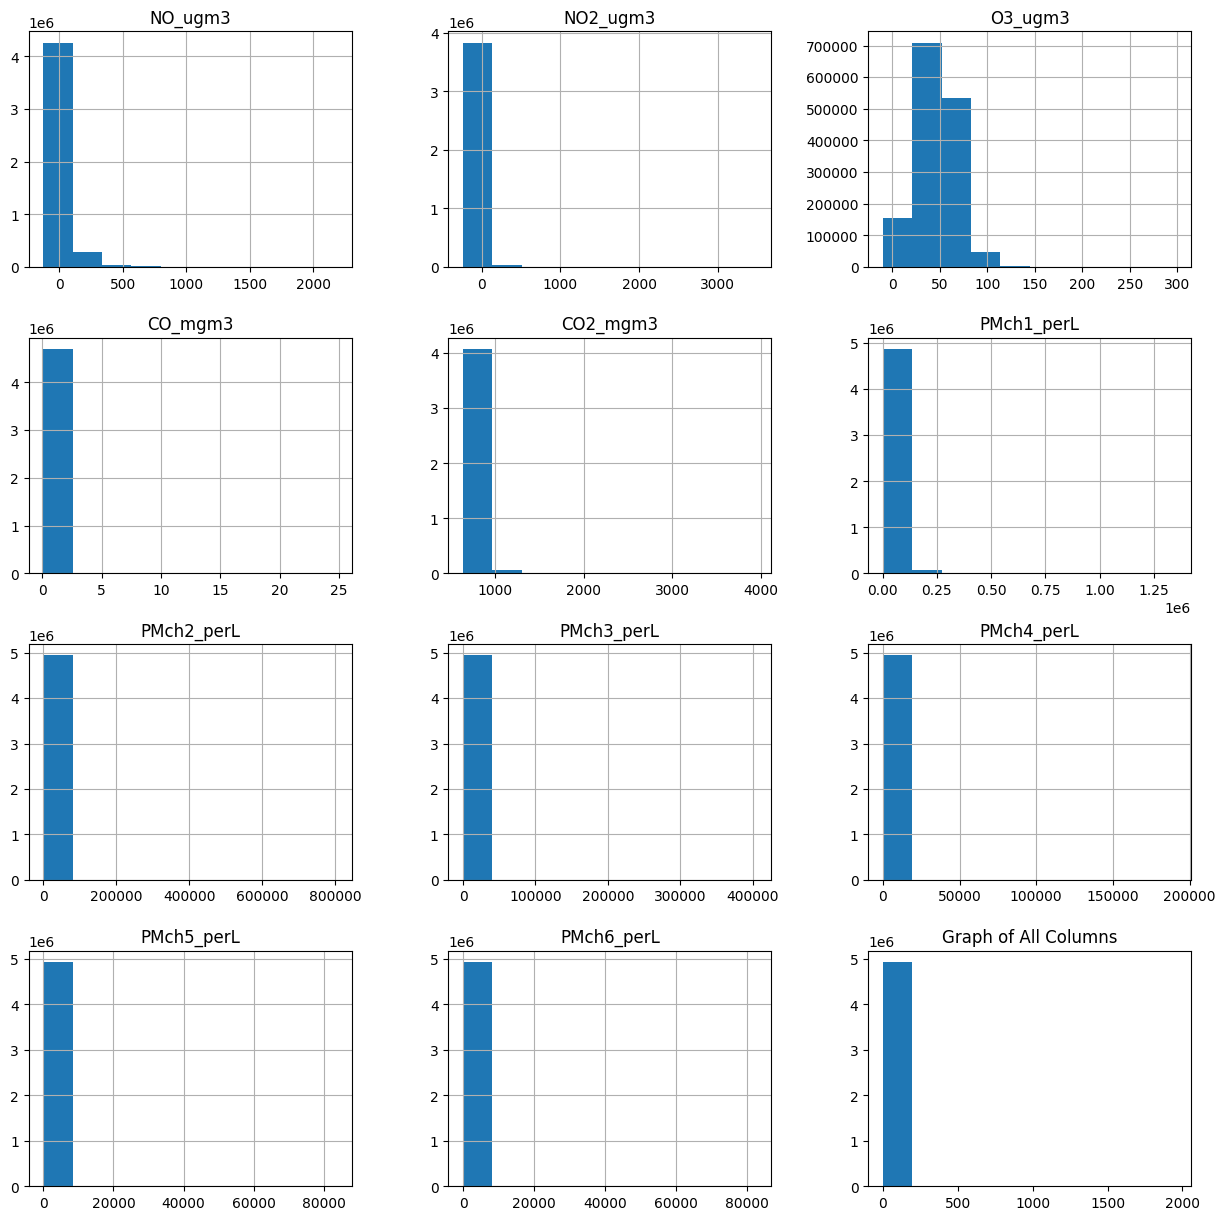

In [23]:
# graph of each column
air.hist(figsize=(15, 15))  # Adjust figsize as needed
plt.title('Graph of All Columns')
plt.grid()
plt.show()

2.4 DIVIDING THE DATASET

In [24]:
# Feature and target separation for regression
X = air.drop(columns=['PM25_ugm3']) # drop the target column
y = air['PM25_ugm3'] # target varible

In [26]:
# First split into training and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (3521100, 12)
Test set size: (754522, 12)


2.5 SUMMARY STATISTICS + VISUALISATIONS

In [ ]:
print("mean:\n", air.mean())
print("-" * 30 + "\n") # Adding a separator between columns for better readability

print("median:\n", air.median())
print("-" * 30 + "\n")

print("mode:\n", air.mode())
print("-" * 30 + "\n")

print("standard deviation:\n", air.std())
print("-" * 30 + "\n")

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(air.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
  # finding the interquartile range of each column gives a measure of the spread of data in the middle 50% of the data - good for checking outliers
  for col in air.columns: # Iterating through each column of the 'air' DataFrame
    # finding the interquartile range gives a measure of the spread of data in the middle 50% of the data - good for checking outliers
    q1 = air[col].quantile(0.25)
    q3 = air[col].quantile(0.75)
    iqr = q3 - q1
    print(f"Column: {col}") # Printing the column name for clarity
    print('Q1:', q1) # value at 25%
    print('Q3:', q3) # value at 75%
    print('IQR:', iqr) # the range of values from 25% to 75% therefore the lower the number the less wide of the spread
    print("-" * 20) # Adding a separator between columns for better readability

In [ ]:
# visualisation for column 11 - distribution of data in this column
target_column = df['PM25_ugm3']
plt.figure(figsize=(8, 5))
sns.histplot(target_column, kde=True)
plt.title(f'Distribution of PM25_ugm3')
plt.xlabel('PM25_ugm3')
plt.show()

In [ ]:
for column in air.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(air[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
scipy.stats.kurtosis(air) # checking for skewness

In [ ]:
air.describe() # checking for outliers

2.6 TRAINING ML MODEL - SOLVING REGRESSION

In [ ]:
# **mutiple regression to show levels of polltion from different chemicals

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(air_scaled, y, test_size=0.2, random_state=42)
reg_model = RandomForestRegressor(random_state=42) # use different regressor and compare
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression RMSE: {rmse:.2f}")

In [ ]:
reg_model = RandomForestRegressor(random_state=42) # use different regressor and compare
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression RMSE: {rmse:.2f}")

2.7 TRAINING ML MODEL - SOLVING CLASSIFICATION

In [ ]:
X, y = iris.data, iris.target  # Features and target labels

# Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()

2.8 EVALUATE PERFORMANCE - ERROR DETECTION / ACCURACY

In [ ]:
# Split for classification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)
clf_model = RandomForestClassifier(random_state=42) # use different and comparex
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {acc:.2f}")

In [ ]:
# Evaluate the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))